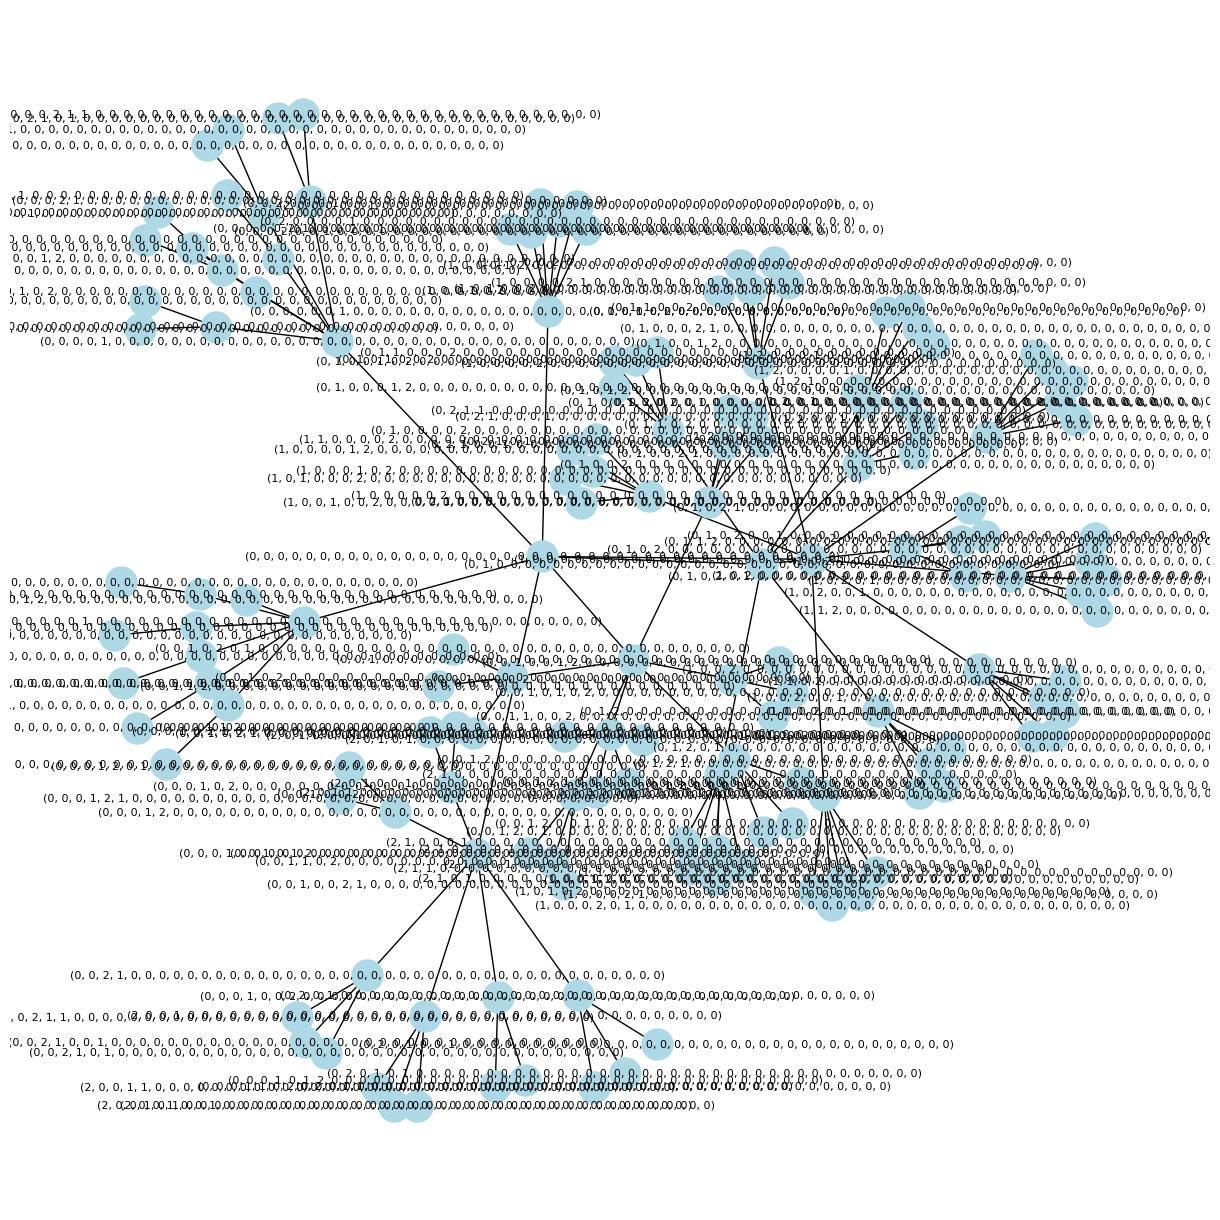

{'remainingOverageTime': 60, 'mark': 2}


KeyError: 'board'

In [30]:
from kaggle_environments import make, evaluate
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create the game environment
env = make("connectx", debug=True)

# Agent that selects moves at random
def agent_random(obs, config):
    valid_moves = [col for col in range(config['columns']) if obs.board[col] == 0]
    return random.choice(valid_moves)

def transform_to_2d(board, config):
    rows, columns = config['rows'], config['columns']
    return [board[i:i + columns] for i in range(0, rows * columns, columns)]

# Utilisation de la fonction
config = {'rows': 6, 'columns': 7, 'inarow': 4}





# Agent that always selects the middle column
def agent_middle(obs, config):
    return config['columns'] // 2

# Simulate possible moves and return the resulting states
def simulate_moves(obs, config, player):
    # Vérifie si le coup est légal
    valid_moves = [col for col in range(config['columns']) if obs['board'][col] == 0]
    possible_states = []
    
    for col in valid_moves:
        board = obs['board'].copy()  # Assurez-vous que c'est une copie profonde si nécessaire.
        for row in range(config['rows']):
            index = col + (row * config['columns'])
            if board[index] == 0:
                board[index] = player
                possible_states.append({'board': board, 'col': col})
                break
    
    return possible_states

def expand_graph(G, obs, config, depth, max_depth, player):
    if depth >= max_depth:
        return
    
    possible_states = simulate_moves(obs, config, player)
    for state in possible_states:
        new_board_tuple = tuple(state['board'])
        if not G.has_node(new_board_tuple):
            G.add_node(new_board_tuple)
            G.add_edge(tuple(obs['board']), new_board_tuple)  # Corrected this line
        new_obs = {'board': state['board']}
        expand_graph(G, new_obs, config, depth + 1, max_depth, player % 2 + 1)


def calcul_alignement(board_2d, player, config, sequence_length):
    # Vérifie les alignements horizontaux
    for row in board_2d:
        consecutive_count = 0
        for cell in row:
            if cell == player:
                consecutive_count += 1
                if consecutive_count == sequence_length:
                    return True  # Retourner True si une séquence est trouvée
            else:
                consecutive_count = 0  # Réinitialiser le compteur si la séquence est interrompue

    # Vérifie les alignements verticaux
    for col_index in range(len(board_2d[0])):
        consecutive_count = 0
        for row in board_2d:
            if row[col_index] == player:
                consecutive_count += 1
                if consecutive_count == sequence_length:
                    return True  # Retourner True si une séquence est trouvée
            else:
                consecutive_count = 0  # Réinitialiser le compteur si la séquence est interrompue

    # Ajoutez ici la logique pour vérifier les alignements diagonaux si nécessaire

    return False  # Retourner False si aucune séquence n'est trouvée

  

        
        
def evalutation( obs , player , config ):
    scores = {}  # Dictionnaire pour stocker les scores de chaque état
        
    for node in graph.nodes:
        board_linear = list(node)  # Convertir le tuple en liste
        board_2d = transform_to_2d(board_linear, config)  # Transformer en 2D
        if calcul_alignement(board_2d, player, config, config['inarow']):
            scores[node] = 100  # Attribuer un score élevé pour une séquence gagnante
        else:
            scores[node] = 0  # Attribuer un score faible si aucune séquence gagnante n'est trouvée

            return scores

    
    
# Calculate the win percentages for the two agents
def get_win_percentages(agent1, agent2, config, n_rounds=100):
    outcomes = evaluate("connectx", [agent1, agent2], config, [], n_rounds//2)
    outcomes += [[b,a] for [a,b] in evaluate("connectx", [agent2, agent1], config, [], n_rounds-n_rounds//2)]
    print("Agent 1 Win Percentage:", np.round(outcomes.count([1,-1])/len(outcomes), 2))
    print("Agent 2 Win Percentage:", np.round(outcomes.count([-1,1])/len(outcomes), 2))
    print("Number of Invalid Plays by Agent 1:", outcomes.count([None, 0]))
    print("Number of Invalid Plays by Agent 2:", outcomes.count([0, None]))

# Configuration for Connect Four
config = {'rows': 6, 'columns': 7, 'inarow': 4}

# Initialize the graph
G = nx.Graph()
initial_board = [0] * config['columns'] * config['rows']  # Empty board
initial_obs = {'board': initial_board}  # Initial observation dictionary
G.add_node(tuple(initial_obs['board']))  # Add the initial state

# Expand the graph to the specified depth
expand_graph(G, initial_obs, config, depth=0, max_depth=3, player=1)

# Draw the graph after expansion
plt.figure(figsize=(12, 12))  # Set the size of the figure
pos = nx.spring_layout(G, scale=2) 
nx.draw(G,pos,  with_labels=True, node_size=500, node_color="lightblue", font_size=8)
plt.show()  # Display the graph

# Play a round of the game with the agents
env.run([agent_random, agent_middle])

# Show the game
env.render(mode="ipython")
print(obs)
last_state = env.state[-1]
obs = last_state.observation
board_2d = transform_to_2d(obs['board'], config)

# Get win percentages
get_win_percentages(agent_random, agent_middle, config, n_rounds=10)

graph_scores = evaluaton(G, config, 1)  # Évaluer pour le joueur 1

# Imprimer le score pour l'état de test
print("Score for the test state:", graph_scores[tuple(test_board)])
